### Table of Contents
- [Early Exploration](#Early-Exploration)
- [Modules](#module)
- [Vizualization Sections](#Vizualizations)
- [Geographical Exploration](#Geo-Exploration)
- [Modeling Begins](#Modeling)

In [26]:
import pandas as pd
import numpy as np


#visualizations libraries
import matplotlib.pyplot as plt
import seaborn as sns
color_pal = sns.color_palette()
plt.style.use('bmh')

#machine learning libraries
import xgboost as xgb
from sklearn.metrics import mean_squared_error

from matplotlib import patheffects

# graphing related libraries
#import pandas_bokeh as gpb
#import geopandas
#from cartopy import crs as ccrs
#import contextily as ctx
#from mpl_toolkits.axes_grid1 import make_axes_locatable



import os


#project modules
import src.wrangle as wr
import src.summaries as su
import src.explore as ex

pd.set_option('display.float_format', lambda x: '%.5f' % x)

## Early Exploration

- [Return to TOC](#Table-of-Contents)

In [16]:
df = pd.read_pickle('data/data.pickle')

In [6]:
df.tail()

,fiscal_year,customer_name,vendor_name,purchase_amount,contract_number,rfo_description,rfo_number,customer_type,customer_contact,customer_address,...,po_number,order_date,shipped_date,dir_contract_mgr,contract_type,contract_subtype,contract_start_date,contract_end_date,contract_termination_date,sales_fact_number
7367053,2023,Lamar Consolidated Independent School District,"Cisco Systems, Inc.",22156.38,DIR-TSO-4167,Cisco Branded Products and Related Services,DIR-TSO-TMP-425,K-12,Accounts Payable,3911 Ave I,...,71009590,06/15/2022,10/30/2022,Tiffanay Waller,Networking Equipment,Networking Equipment,07/03/2018,07/03/2023,07/03/2023,55911606
7367054,2023,Lamar Consolidated Independent School District,"Cisco Systems, Inc.",9155.50,DIR-TSO-4167,Cisco Branded Products and Related Services,DIR-TSO-TMP-425,K-12,Accounts Payable,3911 Ave I,...,71009590,06/15/2022,10/30/2022,Tiffanay Waller,Networking Equipment,Networking Equipment,07/03/2018,07/03/2023,07/03/2023,55911607
7367055,2023,Lamar Consolidated Independent School District,"Cisco Systems, Inc.",44331.09,DIR-TSO-4167,Cisco Branded Products and Related Services,DIR-TSO-TMP-425,K-12,Accounts Payable,3911 Ave I,...,71009590,06/15/2022,10/30/2022,Tiffanay Waller,Networking Equipment,Networking Equipment,07/03/2018,07/03/2023,07/03/2023,55911608
7367056,2023,Lamar Consolidated Independent School District,"Cisco Systems, Inc.",8667.24,DIR-TSO-4167,Cisco Branded Products and Related Services,DIR-TSO-TMP-425,K-12,Accounts Payable,3911 Ave I,...,71009590,06/15/2022,10/30/2022,Tiffanay Waller,Networking Equipment,Networking Equipment,07/03/2018,07/03/2023,07/03/2023,55911609
7367057,2023,Lamar Consolidated Independent School District,"Cisco Systems, Inc.",27161.40,DIR-TSO-4167,Cisco Branded Products and Related Services,DIR-TSO-TMP-425,K-12,Accounts Payable,3911 Ave I,...,71009590,06/15/2022,10/30/2022,Tiffanay Waller,Networking Equipment,Networking Equipment,07/03/2018,07/03/2023,07/03/2023,55911610


In [13]:
df['order_date'].min(), df['order_date'].max()

('01/01/2016', '12/31/2021')

In [14]:
df['fiscal_year'].min(), df['fiscal_year'].max()

(2014, 2023)

In [15]:
df['shipped_date'].min(),df['shipped_date'].max()

('01/01/2015', '12/31/2021')

In [16]:
df['contract_start_date'].min(), df['contract_start_date'].max()

('05/05/2014', '07/03/2018')

In [17]:
df['contract_end_date'].min(), df['contract_end_date'].max()

('07/03/2022', '07/04/2018')

In [18]:
df['contract_termination_date'].min(), df['contract_termination_date'].max()

('07/03/2023', '07/04/2018')

In [4]:
columns = ['order_date', 'shipped_date', 'contract_start_date', 'contract_end_date', 'contract_termination_date']

In [32]:
columns = ['order_date', 'shipped_date', 'contract_start_date', 'contract_end_date', 'contract_termination_date']
df_dates = pd.DataFrame()
for column in columns:
    df_dates[column] = pd.to_datetime(df[column])
df_dates = df_dates.set_index('order_date').sort_index()

In [41]:
df_dates['order_date'].min(), df_dates['order_date'].max()

(Timestamp('2014-05-06 00:00:00'), Timestamp('2022-11-29 00:00:00'))

In [42]:
df_dates['shipped_date'].min(),df_dates['shipped_date'].max()

(Timestamp('2014-05-20 00:00:00'), Timestamp('2022-11-30 00:00:00'))

In [43]:
df_dates['contract_start_date'].min(), df_dates['contract_start_date'].max()

(Timestamp('2014-05-05 00:00:00'), Timestamp('2018-07-03 00:00:00'))

In [44]:
df_dates['contract_end_date'].min(), df_dates['contract_end_date'].max()

(Timestamp('2018-07-04 00:00:00'), Timestamp('2023-07-03 00:00:00'))

In [45]:
df_dates['contract_termination_date'].min(), df_dates['contract_termination_date'].max()

(Timestamp('2018-07-04 00:00:00'), Timestamp('2023-07-03 00:00:00'))

In [7]:
df['customer_zip']

981291     78773
981292     78773
981293     78773
981294     78773
981295     78773
           ...  
7367053    77471
7367054    77471
7367055    77471
7367056    77471
7367057    77471
Name: customer_zip, Length: 378523, dtype: object

In [33]:
df = pd.read_pickle('data/data.pickle')
columns = ['order_date', 'shipped_date', 'contract_start_date', 'contract_end_date', 'contract_termination_date']

for column in columns:
    df[column] = pd.to_datetime(df[column])
df = df.set_index('order_date').sort_index()

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 378523 entries, 2014-05-06 to 2022-11-29
Data columns (total 41 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   fiscal_year                378523 non-null  int64         
 1   customer_name              378523 non-null  object        
 2   vendor_name                378523 non-null  object        
 3   purchase_amount            378523 non-null  float64       
 4   contract_number            378523 non-null  object        
 5   rfo_description            378523 non-null  object        
 6   rfo_number                 378523 non-null  object        
 7   customer_type              378523 non-null  object        
 8   customer_contact           369036 non-null  object        
 9   customer_address           378523 non-null  object        
 10  customer_city              378523 non-null  object        
 11  customer_state             378523 no

In [36]:
pd.to_pickle(df, 'data/indexed_cisco.pickle')

In [40]:
df['invoice_number'].nunique(), df['po_number'].nunique()

(54394, 35283)

In [14]:
df.tail()

,fiscal_year,customer_name,vendor_name,purchase_amount,contract_number,rfo_description,rfo_number,customer_type,customer_contact,customer_address,...,invoice_number,po_number,shipped_date,dir_contract_mgr,contract_type,contract_subtype,contract_start_date,contract_end_date,contract_termination_date,sales_fact_number
order_date,,,,,,,,,,,,,,,,,,,,,
2022-06-15,2023,Lamar Consolidated Independent School District,"Cisco Systems, Inc.",22156.38,DIR-TSO-4167,Cisco Branded Products and Related Services,DIR-TSO-TMP-425,K-12,Accounts Payable,3911 Ave I,...,1982,71009590,2022-10-30,Tiffanay Waller,Networking Equipment,Networking Equipment,2018-07-03,2023-07-03,2023-07-03,55911606
2022-06-15,2023,Lamar Consolidated Independent School District,"Cisco Systems, Inc.",9155.50,DIR-TSO-4167,Cisco Branded Products and Related Services,DIR-TSO-TMP-425,K-12,Accounts Payable,3911 Ave I,...,1982,71009590,2022-10-30,Tiffanay Waller,Networking Equipment,Networking Equipment,2018-07-03,2023-07-03,2023-07-03,55911607
2022-06-15,2023,Lamar Consolidated Independent School District,"Cisco Systems, Inc.",44331.09,DIR-TSO-4167,Cisco Branded Products and Related Services,DIR-TSO-TMP-425,K-12,Accounts Payable,3911 Ave I,...,1982,71009590,2022-10-30,Tiffanay Waller,Networking Equipment,Networking Equipment,2018-07-03,2023-07-03,2023-07-03,55911608
2022-06-15,2023,Lamar Consolidated Independent School District,"Cisco Systems, Inc.",8667.24,DIR-TSO-4167,Cisco Branded Products and Related Services,DIR-TSO-TMP-425,K-12,Accounts Payable,3911 Ave I,...,1982,71009590,2022-10-30,Tiffanay Waller,Networking Equipment,Networking Equipment,2018-07-03,2023-07-03,2023-07-03,55911609
2022-06-15,2023,Lamar Consolidated Independent School District,"Cisco Systems, Inc.",27161.40,DIR-TSO-4167,Cisco Branded Products and Related Services,DIR-TSO-TMP-425,K-12,Accounts Payable,3911 Ave I,...,1982,71009590,2022-10-30,Tiffanay Waller,Networking Equipment,Networking Equipment,2018-07-03,2023-07-03,2023-07-03,55911610


In [74]:
(df.contract_start_date.unique(), df.contract_end_date.unique())

(array(['2014-05-05T00:00:00.000000000', '2018-07-03T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array(['2018-07-04T00:00:00.000000000', '2022-07-03T00:00:00.000000000',
        '2023-07-03T00:00:00.000000000'], dtype='datetime64[ns]'))

In [68]:
df['customer_contact'].unique().tolist()

['Randy Stuart',
 'ACCOUNTS PAYABLE',
 'Donald Gordon',
 'Caren Skipworth',
 'FERNANDO MERCADO',
 'Ernie Stripling',
 'Mike Bahr',
 'Curtis Starnes',
 'David Spann',
 'Kayla Lamm',
 'Martin Negron',
 'FRANCISCO DIAZ',
 'ANA I LOZANO',
 'TODD WALSH',
 'Mike Searight',
 'Sherry Watson',
 'PAUL FIERO',
 'TODD CHURCH',
 'Paul Fiero',
 'Mario Leal',
 'Paula Johnson',
 'Gilbert Porras',
 'Shad McGaha',
 'PAULA JOHNSON',
 'Bob Hollar',
 'Paul Aceves',
 'THELMA PERALES',
 'Kenneth Boehs',
 'ERIC RODRIGUEZ',
 'WESLEY JUSTICE',
 'MARILYN DOUGHTY',
 'MARIA DE JESUS GAMBOA',
 'Cody Lee',
 'Diana Rodriquez',
 'ARNIE SALMERON',
 'RODNEY HUDGINS',
 'Ken Woods',
 'TONY WILLIAMS',
 'ACCOUNTS AP PAYABLE',
 'Wayne Henderson',
 'TOMMIE EDMONSON',
 'CARLOS MARTINEZ',
 'JIM RAY JR.',
 'ROBERT LOVE',
 'Jim Beasley',
 'DONNA BOGUES',
 'KENNETH BOEHS',
 'RANAE SAUR',
 'Yalonda Weaver',
 'A. Jamotta',
 'KEVIN FUSELIER',
 'AMELIA SALINAS',
 'HARRY GOETTE',
 'ABELARDO CASILLAS',
 'JOE GALINDO',
 'JAMES MCCOY',
 '

In [69]:
df['vendor_name'].nunique()

1

In [45]:
df['contract_type'].nunique(), df['contract_subtype'].nunique()

(1, 1)

In [64]:
df['rfo_description'].value_counts()

Cisco Branded Products and Related Services     230209
Cisco Branded Equipment and Related Services    148314
Name: rfo_description, dtype: int64

In [66]:
df['rfo_number'].value_counts()

DIR-TSO-TMP-425    230209
DIR-TSO-TMP-215    148314
Name: rfo_number, dtype: int64

In [71]:
df.columns.tolist()

['fiscal_year',
 'customer_name',
 'vendor_name',
 'purchase_amount',
 'contract_number',
 'rfo_description',
 'rfo_number',
 'customer_type',
 'customer_contact',
 'customer_address',
 'customer_city',
 'customer_state',
 'customer_zip',
 'vendor_contact',
 'vendor_hub_type',
 'vendor_address',
 'vendor_city',
 'vendor_state',
 'vendor_zip',
 'reseller_name',
 'reseller_hub_type',
 'reseller_address',
 'reseller_city',
 'reseller_state',
 'reseller_zip',
 'reseller_phone',
 'report_received_month',
 'purchase_month',
 'brand_name',
 'order_quantity',
 'unit_price',
 'invoice_number',
 'po_number',
 'shipped_date',
 'dir_contract_mgr',
 'contract_type',
 'contract_subtype',
 'contract_start_date',
 'contract_end_date',
 'contract_termination_date',
 'sales_fact_number']

In [76]:
df['reseller_hub_type'].value_counts()

Non HUB            273410
Hispanic/Female     77692
Woman Owned         22402
Asian/Female         3372
Black/Female          938
Hispanic/Male         678
Black/Male             30
Asian/Male              1
Name: reseller_hub_type, dtype: int64

In [75]:
df.tail()

,fiscal_year,customer_name,vendor_name,purchase_amount,contract_number,rfo_description,rfo_number,customer_type,customer_contact,customer_address,...,invoice_number,po_number,shipped_date,dir_contract_mgr,contract_type,contract_subtype,contract_start_date,contract_end_date,contract_termination_date,sales_fact_number
order_date,,,,,,,,,,,,,,,,,,,,,
2022-11-25,2023,Harlingen Waterworks System,"Cisco Systems, Inc.",2469.24,DIR-TSO-4167,Cisco Branded Products and Related Services,DIR-TSO-TMP-425,Local Government,Accounts Payable,PO BOX 1950,...,GB00475638,232760,2022-11-29,Tiffanay Waller,Networking Equipment,Networking Equipment,2018-07-03,2023-07-03,2023-07-03,55908445
2022-11-28,2023,City of San Antonio,"Cisco Systems, Inc.",430.00,DIR-TSO-4167,Cisco Branded Products and Related Services,DIR-TSO-TMP-425,Local Government,Accounts Payable,Po Box 839966,...,423158,8000437865,2022-11-29,Tiffanay Waller,Networking Equipment,Networking Equipment,2018-07-03,2023-07-03,2023-07-03,55908576
2022-11-28,2023,City of Duncanville,"Cisco Systems, Inc.",525.78,DIR-TSO-4167,Cisco Branded Products and Related Services,DIR-TSO-TMP-425,Local Government,Accounts Payable,203 E. Wheatland Rd.,...,GB00475670,20221128,2022-11-29,Tiffanay Waller,Networking Equipment,Networking Equipment,2018-07-03,2023-07-03,2023-07-03,55908450
2022-11-29,2023,Railroad Commission of Texas,"Cisco Systems, Inc.",418.96,DIR-TSO-4167,Cisco Branded Products and Related Services,DIR-TSO-TMP-425,State Agency,Accounts Payable,Po Box 12967,...,FJ33157,23-0649,2022-11-29,Tiffanay Waller,Networking Equipment,Networking Equipment,2018-07-03,2023-07-03,2023-07-03,55908685
2022-11-29,2023,Montgomery County Emergency Communications Dis...,"Cisco Systems, Inc.",1376.48,DIR-TSO-4167,Cisco Branded Products and Related Services,DIR-TSO-TMP-425,Local Government,Accounts Payable,Po Box 1830,...,FJ59539,66979,2022-11-30,Tiffanay Waller,Networking Equipment,Networking Equipment,2018-07-03,2023-07-03,2023-07-03,55908758


In [88]:
df = pd.read_pickle('data/data.pickle')
columns = ['order_date', 'shipped_date', 'contract_start_date', 'contract_end_date', 'contract_termination_date']

for column in columns:
    df[column] = pd.to_datetime(df[column])

df = df.set_index('order_date').sort_index()

drop_columns = ['fiscal_year',
 'rfo_description',
 'rfo_number',
 'brand_name',
 'customer_contact',
 'customer_address',
 'customer_state',
 'customer_zip',
 'vendor_name',
 'vendor_contact',
 'vendor_city',
 'vendor_hub_type',
 'vendor_address',
 'vendor_state',
 'vendor_zip',
 'reseller_address',
 'reseller_state',
 'reseller_zip',
 'reseller_phone',
 'report_received_month',
 'purchase_month',
 'invoice_number',
 'shipped_date',
 'dir_contract_mgr',
 'contract_type',
 'contract_subtype',
 'contract_start_date',
 'contract_end_date',
 'contract_termination_date',
 'sales_fact_number']

df = df.drop(columns = drop_columns)

df.head()

,customer_name,purchase_amount,contract_number,customer_type,customer_city,reseller_name,reseller_hub_type,reseller_city,order_quantity,unit_price,po_number,order_date
981291,Texas Department of Public Safety,2657.25,DIR-TSO-4167,State Agency,Austin,"Presidio Networked Solutions Group, LLC",Non HUB,San Antonio,3.0,885.75,21P0008145,2021-03-02
981292,Texas Department of Public Safety,3053.83,DIR-TSO-4167,State Agency,Austin,"Presidio Networked Solutions Group, LLC",Non HUB,San Antonio,1.0,3053.83,21P0008145,2021-03-02
981293,Texas Department of Public Safety,3748.07,DIR-TSO-4167,State Agency,Austin,"Presidio Networked Solutions Group, LLC",Non HUB,San Antonio,1.0,3748.07,21P0008145,2021-03-02
981294,Texas Department of Public Safety,3748.07,DIR-TSO-4167,State Agency,Austin,"Presidio Networked Solutions Group, LLC",Non HUB,San Antonio,1.0,3748.07,21P0008145,2021-03-02
981295,Texas Department of Public Safety,3748.07,DIR-TSO-4167,State Agency,Austin,"Presidio Networked Solutions Group, LLC",Non HUB,San Antonio,1.0,3748.07,21P0008145,2021-03-02


In [85]:
df.shape

(378523, 11)

## module

- [Table of Contents](#Table-of-Contents)

In [45]:
def get_data():
    df = pd.read_pickle('data/data.pickle')

    columns = ['order_date', 'shipped_date']

    for column in columns:
        df[column] = pd.to_datetime(df[column])


    drop_columns = [
     'fiscal_year',
     'rfo_description',
     'rfo_number',
     'brand_name',
     'customer_contact',
     'customer_address',
     'customer_state',
     #'customer_zip',
     'vendor_name',
     'vendor_contact',
     'vendor_city',
     'vendor_hub_type',
     'vendor_address',
     'vendor_state',
     'vendor_zip',
     'reseller_address',
     'reseller_state',
     'reseller_zip',
     'reseller_phone',
     'report_received_month',
     'purchase_month',
     'invoice_number',
     'shipped_date',
     'dir_contract_mgr',
     'contract_type',
     'contract_subtype',
     'contract_start_date',
     'contract_end_date',
     'contract_termination_date',
     'sales_fact_number']

    df = df.drop(columns = drop_columns)
    df = df.set_index('order_date').sort_index()
    df = df.loc['2018':]
    
    
    df['year'] = df.index.year
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['week'] = df.index.week
    df['day_of_week'] = df.index.day_of_week
    df['day_of_year'] = df.index.day_of_year
    # month and day human readable
    df['month_name'] = df.index.month_name()
    df['day_name'] = df.index.day_name()
    
    return df

In [109]:
df = df.set_index('order_date').sort_index()

In [ ]:
df['reseller_hub_type'].isnull()

981291     False
981292     False
981293     False
981294     False
981295     False
           ...  
7367053    False
7367054    False
7367055    False
7367056    False
7367057    False
Name: reseller_hub_type, Length: 378523, dtype: bool

In [103]:
df['reseller_hub_type'].unique()

array(['Non HUB', 'Hispanic/Male', 'Hispanic/Female', 'Asian/Female',
       'Black/Female', 'Woman Owned', 'Black/Male', 'Asian/Male'],
      dtype=object)

In [105]:
df = pd.read_pickle('data/data.pickle')
columns = ['order_date', 'shipped_date']

df = basic_clean(df)
df.head()

,customer_name,purchase_amount,customer_type,customer_city,reseller_name,reseller_city,order_quantity,unit_price,po_number,shipped_date,order_date_copy
order_date,,,,,,,,,,,
2018-01-02,Odem-Edroy Independent School District,4532.00,K-12,Odem,Great South Texas Corporation dba Computer Sol...,San Antonio,16.0,283.25,173494,2018-01-11,2018-01-02
2018-01-02,Odem-Edroy Independent School District,2860.00,K-12,Odem,Great South Texas Corporation dba Computer Sol...,San Antonio,16.0,178.75,173494,2018-01-11,2018-01-02
2018-01-02,Odem-Edroy Independent School District,187.04,K-12,Odem,Great South Texas Corporation dba Computer Sol...,San Antonio,16.0,11.69,173494,2018-01-11,2018-01-02
2018-01-02,Odem-Edroy Independent School District,428.96,K-12,Odem,Great South Texas Corporation dba Computer Sol...,San Antonio,16.0,26.81,173494,2018-01-11,2018-01-02
2018-01-02,San Benito Consolidated Independent School Dis...,63.36,K-12,San Benito,"Insight Public Sector, Inc.",Tempe,1.0,63.36,191971,2018-02-03,2018-01-02


In [107]:
df.isnull().count

<bound method DataFrame.count of             customer_name  purchase_amount  customer_type  customer_city  \
order_date                                                                 
2018-01-02          False            False          False          False   
2018-01-02          False            False          False          False   
2018-01-02          False            False          False          False   
2018-01-02          False            False          False          False   
2018-01-02          False            False          False          False   
...                   ...              ...            ...            ...   
2022-11-25          False            False          False          False   
2022-11-28          False            False          False          False   
2022-11-28          False            False          False          False   
2022-11-29          False            False          False          False   
2022-11-29          False            False          Fal

In [8]:
df['order_quantity'].max(), df['order_quantity'].min()

(94093187.0, -1273855.9375)

In [10]:
df[df['order_quantity'] < 0].shape

(2863, 19)

## Vizualizations

- [Back to Top](#Table-of-Contents)

### Question I investigated
- We know that the covid-19 global pandemic altered business in the United States among countries of the world. Certainly Cisco sales in the state of Texas would be effected somehow. I set out to see if there would be large anamolous activities around the year 2020. First, I found that there is an enormous jump in quantities of orders from customers. This jump occured on Janurary 2, 2020. Texas Health and Human Services Commission purchased 3,767,123 units of something and 865,822 unites of something else. What were the things purchased? We cannot say from this data but considering the first order had a price of \\$0.00186 per unit and \\$0.00085 per unit, we speculate that it might be licenses for cisco connect, Cisco System's VPN service. 

- We found that a large purchase order like this is made for Texas Health and Human Services periodically, but the purchase is limited to around 1 million somethings. This purchase probably had to do with foresight regarding what could come given the brewing pandemic which was being reported in China. 

In [10]:
df = get_data()

<AxesSubplot:xlabel='order_date'>

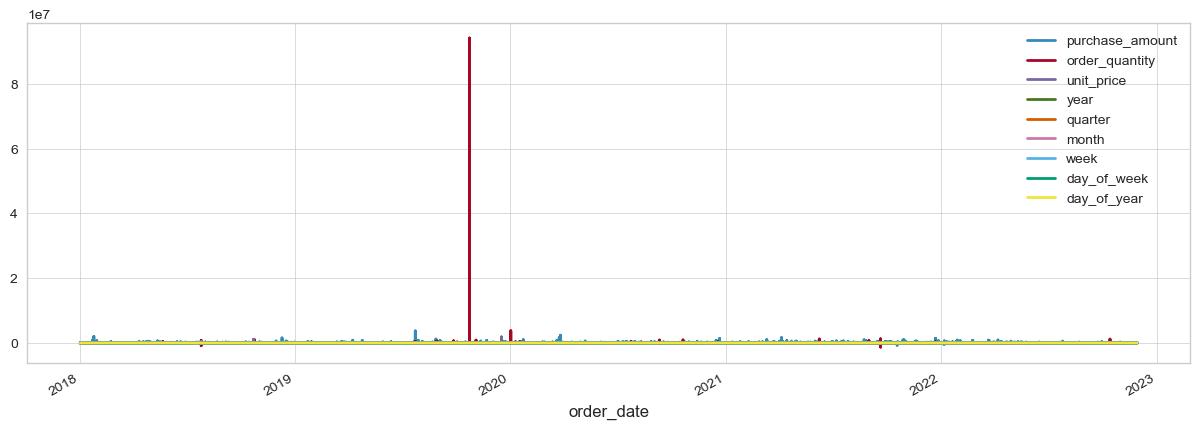

In [48]:
plt.style.use("seaborn-whitegrid")
fix, ax = plt.subplots(figsize = (15,5))
df.plot(ax=ax, label='Training Set')

<AxesSubplot:xlabel='order_date'>

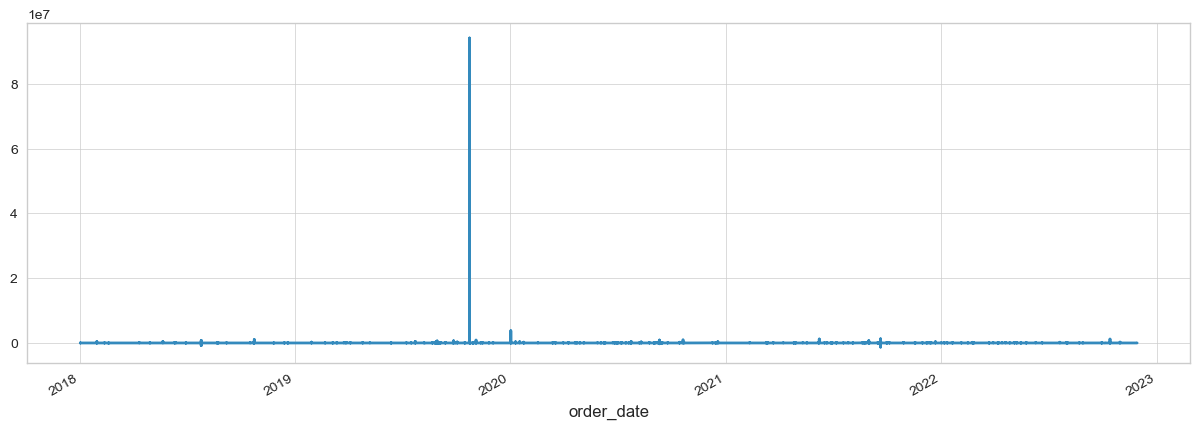

In [50]:
plt.style.use("seaborn-whitegrid")
fix, ax = plt.subplots(figsize = (15,5))
df['order_quantity'].plot(ax=ax, label='Training Set')

In [43]:
df = wr.get_clean_data(start2018=True)
df.info()

/Users/CryanRedrose/codeup-data-science/CodeUp/cisco-time-series-analysis/rosenberger/src/wrangle.py:128: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week'] = df.index.week
/Users/CryanRedrose/codeup-data-science/CodeUp/cisco-time-series-analysis/rosenberger/src/wrangle.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.customer_type.replace({'Assistance Org':'Other'},inplace=True)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 261886 entries, 2018-01-02 to 2022-11-29
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   customer_name    261886 non-null  object        
 1   customer_type    261886 non-null  object        
 2   customer_city    261886 non-null  object        
 3   reseller_name    261886 non-null  object        
 4   reseller_city    261403 non-null  object        
 5   customer_zip     261886 non-null  object        
 6   order_quantity   261886 non-null  float64       
 7   unit_price       261886 non-null  float64       
 8   po_number        261883 non-null  object        
 9   shipped_date     261886 non-null  datetime64[ns]
 10  order_date_copy  261886 non-null  datetime64[ns]
 11  year             261886 non-null  int64         
 12  quarter          261886 non-null  int64         
 13  month_name       261886 non-null  object        
 14  day_

In [44]:
df.index.min(), df.index.max()

(Timestamp('2018-01-02 00:00:00'), Timestamp('2022-11-29 00:00:00'))

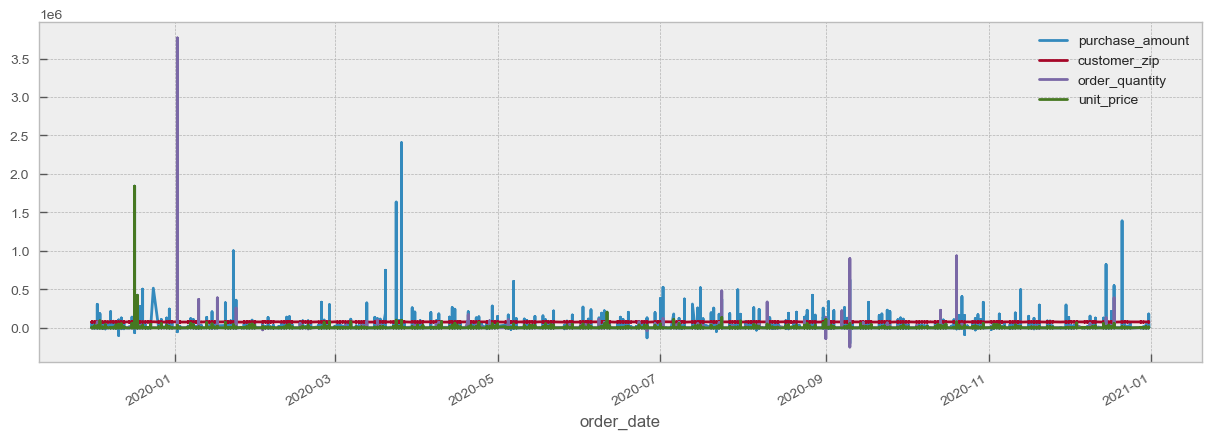

In [41]:
df = get_data()
#df = wr.get_clean_data(start2018=True)
pandemic_df = df.loc[df.index >= '12-01-2019']
pandemic_df = pandemic_df.loc[pandemic_df.index < '01-01-2021']

#plt.style.use('dark_background')
fix, ax = plt.subplots(figsize = (15,5))
#ax = pandemic_df.plot(x_compat=True)-
pandemic_df.plot(ax=ax, label='Training Set')
plt.show()

In [14]:
jan2 = pandemic_df.loc[pandemic_df.index == '01-02-2020']
jan2.sort_values(by=['order_quantity'], ascending = False).head(2)

,customer_name,purchase_amount,contract_number,customer_type,customer_city,customer_zip,reseller_name,reseller_hub_type,reseller_city,order_quantity,unit_price,po_number
order_date,,,,,,,,,,,,
2020-01-02,Texas Health and Human Services Commission,7010.62000,DIR-TSO-4167,State Agency,Austin,78711,"Netsync Network Solutions, Inc.",Hispanic/Female,Houston,3767123.28770,0.00186,HHSTX-0-0000202893
2020-01-02,Texas Health and Human Services Commission,734.22000,DIR-TSO-4167,State Agency,Austin,78711,"Netsync Network Solutions, Inc.",Hispanic/Female,Houston,865822.78480,0.00085,HHSTX-0-0000202893


<BarContainer object of 5 artists>

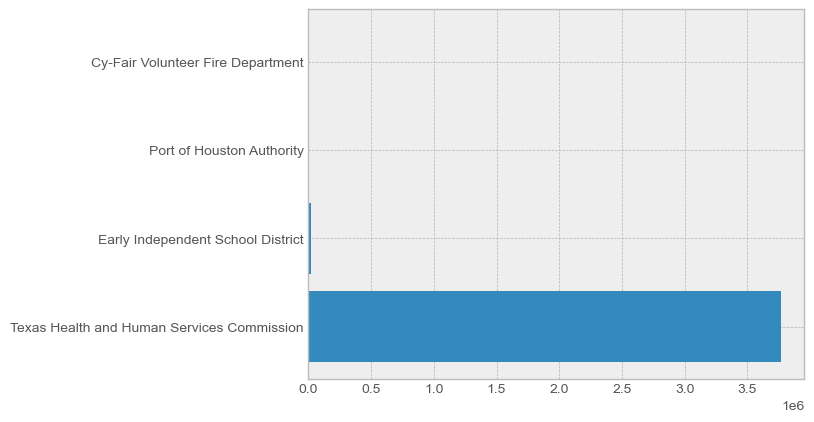

In [29]:
jan2 = pandemic_df.loc[pandemic_df.index == '01-02-2020']
jan2purchases = jan2.sort_values(by=['order_quantity'], ascending = False).head(5)
fig, ax = plt.subplots()
ax.barh(jan2purchases.customer_name, jan2purchases.order_quantity)

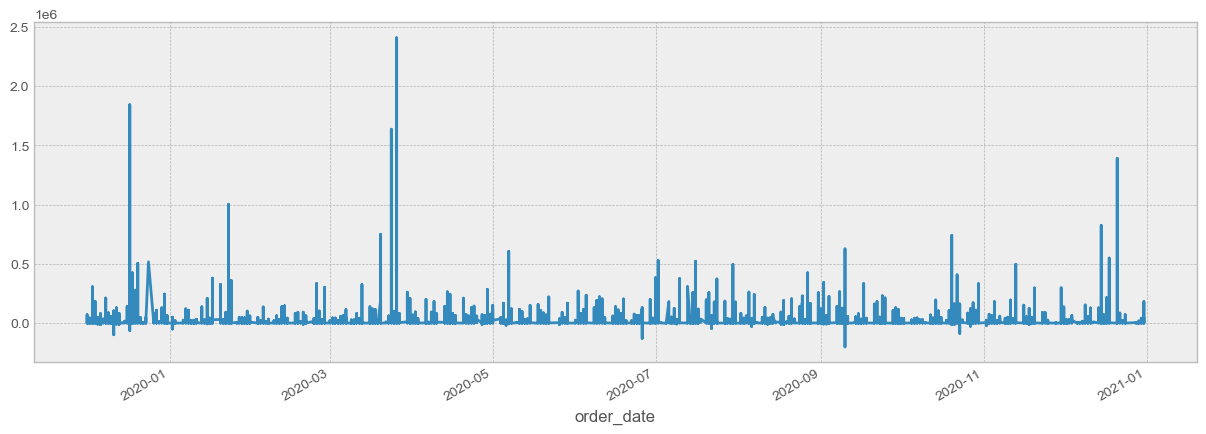

In [30]:
fix, ax = plt.subplots(figsize = (15,5))
#ax = pandemic_df.plot(x_compat=True)
pandemic_df['purchase_amount'].plot(ax=ax, label='Training Set')
plt.show()

### Train / Test Split

In [2]:
df = wr.get_clean_data(start2018=True)
df.head()

NameError: name 'wr' is not defined

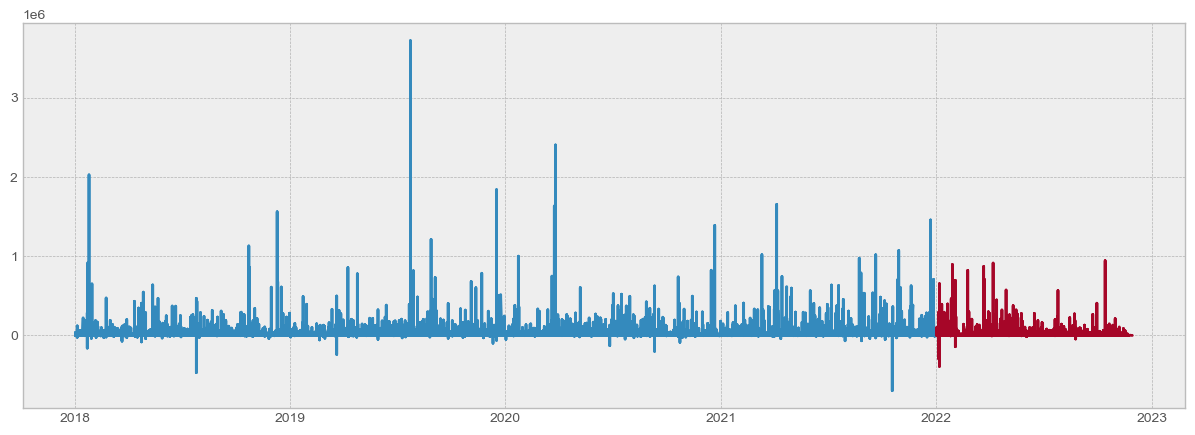

In [31]:
df = get_data()
train = df.loc[df.index < '01-01-2022']
test = df.loc[df.index >= '01-01-2022']
plt.style.use('bmh')

fix, ax = plt.subplots(figsize = (15,5))

plt.plot(train.index, train.purchase_amount, label='Training Set')
plt.plot(test.index, test.purchase_amount, label= 'Test Set')
plt.show()

In [24]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

## Geo-Exploration

- [Return to TOC](#Table-of-Contents)

In [6]:
#df = wr.get_clean_data()
#df.to_pickle('data/cleaned_df.pickle')
#df.head()

In [22]:
df = pd.read_pickle('data/data.pickle')

,customer_name,customer_type,customer_city,reseller_name,reseller_city,customer_zip,order_quantity,unit_price,po_number,shipped_date,order_date_copy,year,month_name,day_name,month,week,day_of_week,day_of_year,purchase_amount
order_date,,,,,,,,,,,,,,,,,,,
2014-05-06,Carroll Independent School District,K-12,Southlake,NaN,NaN,76092,2.0,4328.10,PA2,2014-06-17,2014-05-06,2014,May,Tuesday,5,19,1,126,8656.20
2014-05-06,Carroll Independent School District,K-12,Southlake,NaN,NaN,76092,4.0,6017.76,PA2,2014-06-17,2014-05-06,2014,May,Tuesday,5,19,1,126,24071.04
2014-05-06,Carroll Independent School District,K-12,Southlake,NaN,NaN,76092,1.0,6085.80,PA2,2014-06-17,2014-05-06,2014,May,Tuesday,5,19,1,126,6085.80
2014-05-06,Carroll Independent School District,K-12,Southlake,NaN,NaN,76092,4.0,720.50,PA2,2014-06-17,2014-05-06,2014,May,Tuesday,5,19,1,126,2882.00
2014-05-06,Carroll Independent School District,K-12,Southlake,NaN,NaN,76092,1.0,268.55,PA2,2014-06-17,2014-05-06,2014,May,Tuesday,5,19,1,126,268.55


In [5]:
covidworld = world.plot(column='Cases - cumulative total per 1 million population',\
legend=True, legend_kwds={'shrink': 0.5}, figsize=(20, 15),\
missing_kwds={"color": "purple","edgecolor": "grey","hatch": "///","label": "Missing values"})

covidworld = world.plot()

In [ ]:
texassales = texas.plot

In [3]:
usa = geopandas.read_file(geopandas.datasets.get_path('tl_2022_us_state'))

<AxesSubplot:>

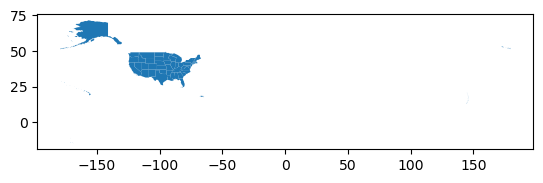

In [4]:
usa.plot()

In [17]:
usa[usa['STUSPS'] == 'TX']

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
25,3,7,48,01779801,48,TX,Texas,00,G4000,A,676685555821,18974391187,+31.4347032,-099.2818238,"POLYGON ((-98.42353 34.08284, -98.42235 34.082..."


/Users/CryanRedrose/.pyenv/versions/anaconda3-2022.10/lib/python3.9/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


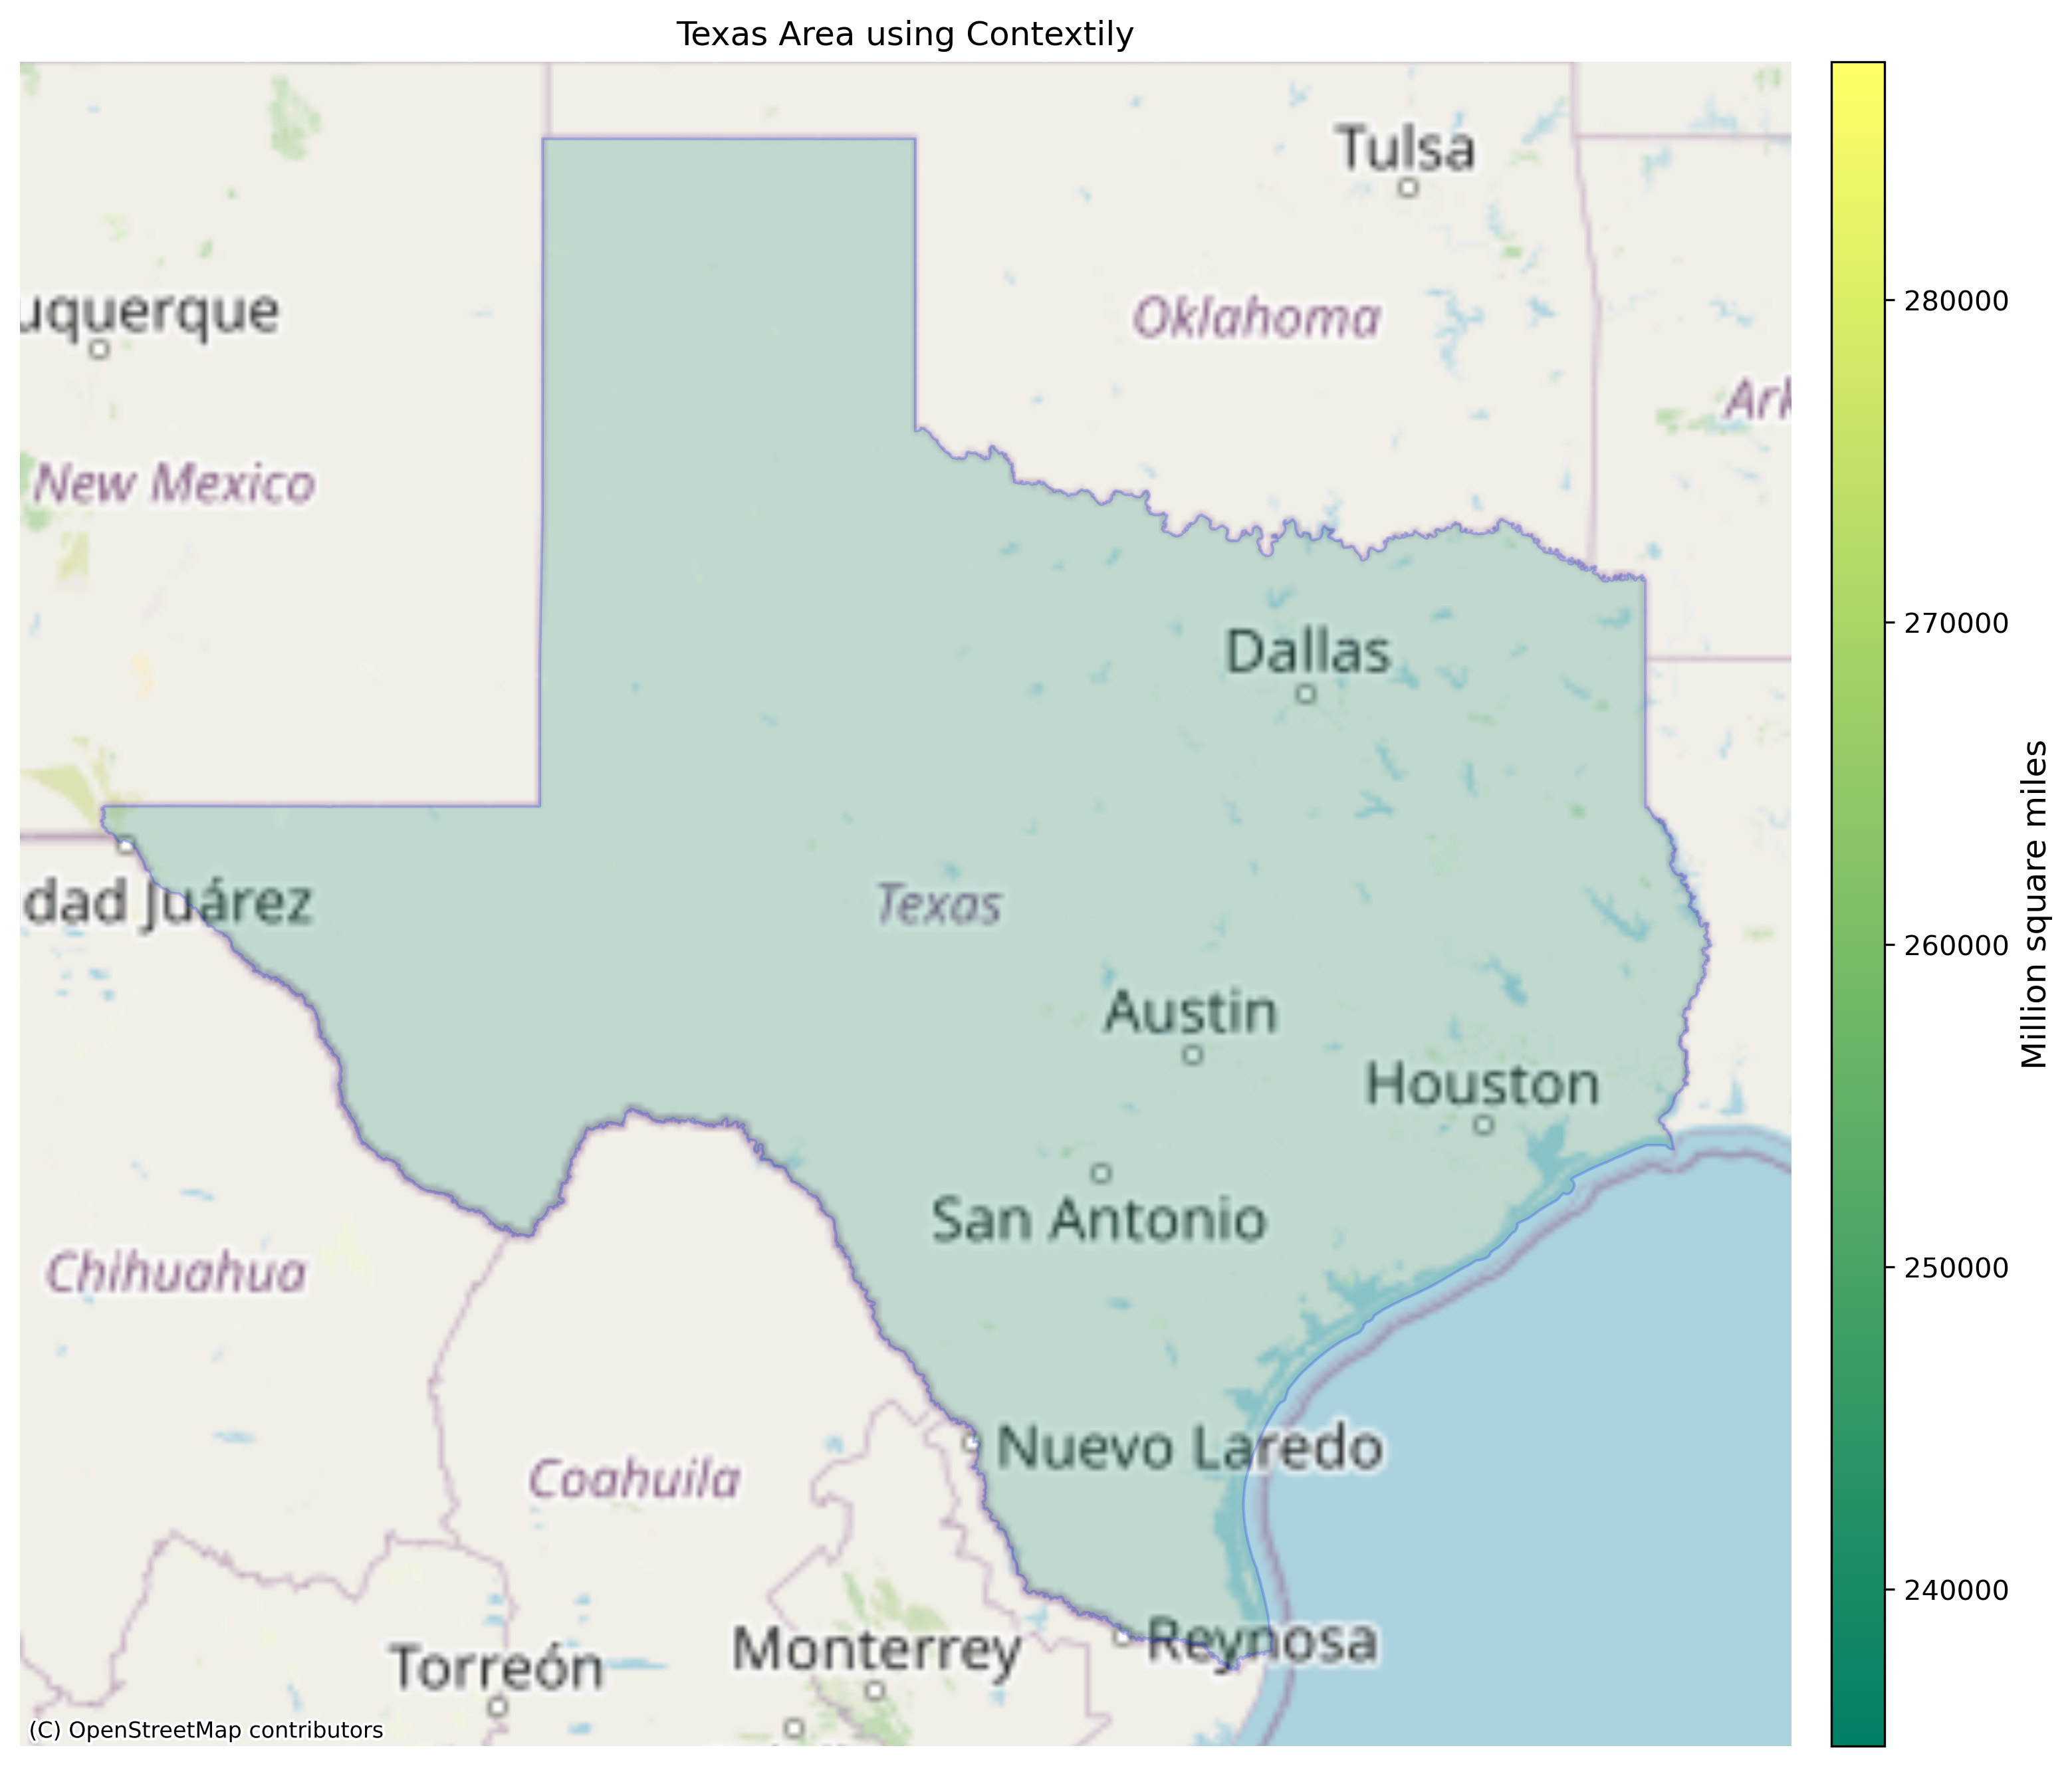

In [102]:
zoom = 5
texas = usa.loc[usa['STUSPS'] == 'TX']
texas.crs = "EPSG:4326"
f,ax = plt.subplots(1,1, figsize=(10,10), 
sharex=True,sharey=True, dpi=300)
f.tight_layout(pad=0.8)
ax.set_axis_off()

texas['ALAND_miles'] = usa['ALAND']*3.86102e-7
plt.title('Texas Area using Contextily',fontsize='large')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.2)
ux = texas.to_crs(epsg=3857).plot('ALAND_miles', 
                                  ax=ax, 
                                  edgecolor='blue',    
                                  cmap='summer', 
                                  alpha = 0.2, 
                                  legend=True, 
                                  cax=cax)
ctx.add_basemap(ux,    
                zoom=zoom,
                source=ctx.providers.OpenStreetMap.Mapnik);
plt.ylabel('Million square miles', fontsize=12)
# Use savefig to save your map
plt.savefig(
'US Contextily Map with zoom = ' + str(zoom) +' .png')
plt.show()



#texas.plot()

In [ ]:
zipcodes = pd.read_csv('data/uszips.csv')

In [109]:
zipcodes.head()

,zip,lat,lng,city,state_id,state_name,zcta,parent_zcta,population,density,county_fips,county_name,county_weights,county_names_all,county_fips_all,imprecise,military,timezone
0,601,18.18027,-66.75266,Adjuntas,PR,Puerto Rico,True,NaN,16773.00000,100.50000,72001,Adjuntas,"{""72001"": 98.73, ""72141"": 1.27}",Adjuntas|Utuado,72001|72141,False,False,America/Puerto_Rico
1,602,18.36075,-67.17541,Aguada,PR,Puerto Rico,True,NaN,37083.00000,472.10000,72003,Aguada,"{""72003"": 100}",Aguada,72003,False,False,America/Puerto_Rico
2,603,18.45744,-67.12225,Aguadilla,PR,Puerto Rico,True,NaN,45652.00000,513.20000,72005,Aguadilla,"{""72005"": 99.76, ""72099"": 0.24}",Aguadilla|Moca,72005|72099,False,False,America/Puerto_Rico
3,606,18.16585,-66.93716,Maricao,PR,Puerto Rico,True,NaN,6231.00000,54.30000,72093,Maricao,"{""72093"": 82.26, ""72153"": 11.68, ""72121"": 6.06}",Maricao|Yauco|Sabana Grande,72093|72153|72121,False,False,America/Puerto_Rico
4,610,18.29110,-67.12243,Anasco,PR,Puerto Rico,True,NaN,26502.00000,275.70000,72011,Añasco,"{""72011"": 96.71, ""72099"": 2.81, ""72083"": 0.37,...",Añasco|Moca|Las Marías|Aguada,72011|72099|72083|72003,False,False,America/Puerto_Rico


In [112]:
texzips = zipcodes[zipcodes['state_id'] == 'TX']

In [118]:
texzips = texzips.drop(texzips.columns[3:], axis = 1)

,zip,lat,lng
26018,73960,36.49167,-101.79265
26358,75001,32.96015,-96.83808
26359,75002,33.08946,-96.60639
26360,75006,32.96165,-96.89717
26361,75007,33.00498,-96.89590


In [144]:
df = df.drop('contract_number', axis = 1)

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 261910 entries, 2018-01-02 to 2022-11-29
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   customer_name      261910 non-null  object 
 1   purchase_amount    261910 non-null  int64  
 2   customer_type      261910 non-null  object 
 3   customer_city      261910 non-null  object 
 4   customer_zip       261910 non-null  int64  
 5   reseller_name      261910 non-null  object 
 6   reseller_hub_type  261910 non-null  object 
 7   reseller_city      261427 non-null  object 
 8   order_quantity     261910 non-null  int64  
 9   unit_price         261910 non-null  int64  
 10  po_number          121344 non-null  float64
dtypes: float64(1), int64(4), object(6)
memory usage: 32.0+ MB


In [161]:
df['purchase_amount'] = df['purchase_amount'].astype('int64')
df['customer_zip'] = df['customer_zip'].astype('int64')
df['order_quantity'] = df['order_quantity'].astype('int64')
df['unit_price'] = df['unit_price'].astype('int64')
df['po_number'] = df['po_number'].astype('int64', coerce = True)


TypeError: astype() got an unexpected keyword argument 'coerce'

## Modeling

[return to top](#Table-of-Contents)

In [166]:
df = wr.get_clean_data(start2018=True)
train, test = wr.split_data(df)

/Users/CryanRedrose/codeup-data-science/CodeUp/cisco-time-series-analysis/rosenberger/src/wrangle.py:127: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['month'] = df.index.month
/Users/CryanRedrose/codeup-data-science/CodeUp/cisco-time-series-analysis/rosenberger/src/wrangle.py:144: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # make assistance org other


In [167]:
df.head()

,customer_name,customer_type,customer_city,reseller_name,reseller_city,customer_zip,order_quantity,unit_price,po_number,shipped_date,order_date_copy,year,month_name,day_name,month,week,day_of_week,day_of_year,purchase_amount
order_date,,,,,,,,,,,,,,,,,,,
2018-01-02,Odem-Edroy Independent School District,K-12,Odem,Great South Texas Corporation dba Computer Sol...,San Antonio,78370.00000,16.00000,283.25000,173494,2018-01-11,2018-01-02,2018,January,Tuesday,1,1,1,2,4532.00000
2018-01-02,Odem-Edroy Independent School District,K-12,Odem,Great South Texas Corporation dba Computer Sol...,San Antonio,78370.00000,16.00000,178.75000,173494,2018-01-11,2018-01-02,2018,January,Tuesday,1,1,1,2,2860.00000
2018-01-02,Odem-Edroy Independent School District,K-12,Odem,Great South Texas Corporation dba Computer Sol...,San Antonio,78370.00000,16.00000,11.69000,173494,2018-01-11,2018-01-02,2018,January,Tuesday,1,1,1,2,187.04000
2018-01-02,Odem-Edroy Independent School District,K-12,Odem,Great South Texas Corporation dba Computer Sol...,San Antonio,78370.00000,16.00000,26.81000,173494,2018-01-11,2018-01-02,2018,January,Tuesday,1,1,1,2,428.96000
2018-01-02,San Benito Consolidated Independent School Dis...,K-12,San Benito,"Insight Public Sector, Inc.",Tempe,78586.00000,1.00000,63.36000,191971,2018-02-03,2018-01-02,2018,January,Tuesday,1,1,1,2,63.36000


In [177]:
df = wr.get_clean_data(start2018=True)
df['purchase_amount'] = df['purchase_amount'].astype('int64')
df['customer_zip'] = df['customer_zip'].astype('int16')
df['order_quantity'] = df['order_quantity'].astype('int16')
df['unit_price'] = df['unit_price'].astype('float64')

/Users/CryanRedrose/codeup-data-science/CodeUp/cisco-time-series-analysis/rosenberger/src/wrangle.py:127: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['month'] = df.index.month
/Users/CryanRedrose/codeup-data-science/CodeUp/cisco-time-series-analysis/rosenberger/src/wrangle.py:144: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # make assistance org other


In [178]:
df.sort_values(by = 'unit_price')

,customer_name,customer_type,customer_city,reseller_name,reseller_city,customer_zip,order_quantity,unit_price,po_number,shipped_date,order_date_copy,year,month_name,day_name,month,week,day_of_week,day_of_year,purchase_amount
order_date,,,,,,,,,,,,,,,,,,,
2020-07-20,Texas Health and Human Services Commission,State Agency,Austin,"Insight Public Sector, Inc.",Tempe,13175,4,0.00000,HHSTX-0-226598,2020-07-29,2020-07-20,2020,July,Monday,7,30,0,202,0
2018-12-31,North Texas Tollway Authority,Local Government,Plano,Technologent,Irvine,9490,16,0.00000,04904-NTT-00-GS-IT-BOS,2019-06-06,2018-12-31,2018,December,Monday,12,1,0,365,0
2018-12-31,North Texas Tollway Authority,Local Government,Plano,Technologent,Irvine,9490,8,0.00000,04904-NTT-00-GS-IT-BOS,2019-06-06,2018-12-31,2018,December,Monday,12,1,0,365,0
2018-12-31,North Texas Tollway Authority,Local Government,Plano,Technologent,Irvine,9490,8,0.00000,04904-NTT-00-GS-IT-BOS,2019-06-06,2018-12-31,2018,December,Monday,12,1,0,365,0
2018-12-31,North Texas Tollway Authority,Local Government,Plano,Technologent,Irvine,9490,2,0.00000,04904-NTT-00-GS-IT-BOS,2019-06-06,2018-12-31,2018,December,Monday,12,1,0,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-26,City of Austin,Local Government,Austin,"Insight Public Sector, Inc.",Tempe,13208,1,468750.00000,56001872713597-1,2019-04-16,2018-07-26,2018,July,Thursday,7,30,3,207,468750
2018-07-26,City of Austin,Local Government,Austin,"Insight Public Sector, Inc.",Tempe,13208,-1,468750.00000,56001872713597-1,2019-03-28,2018-07-26,2018,July,Thursday,7,30,3,207,-468750
2018-01-30,Texas Department of Information Resources,State Agency,Austin,"Exebridge, Inc",Austin,13165,1,650990.68000,0000005342,2018-02-26,2018-01-30,2018,January,Tuesday,1,5,1,30,650990


In [186]:
df.isnull().sum()

customer_name          0
purchase_amount        0
contract_number        0
customer_type          0
customer_city          0
customer_zip           0
reseller_name          0
reseller_hub_type      0
reseller_city        483
order_quantity         0
unit_price             0
po_number              3
dtype: int64